<a href="https://colab.research.google.com/github/aimldlnlp/Data-Analysis-Project-Dicoding/blob/main/Data_Analysis_Project_Dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis Project: Bike-sharing-dataset
- **Name:** Ziandine Zidan Alsyahana
- **Email:** m180b4ky4627@bangkit.academy
- **ID Dicoding:** pengenjago_ai

## Defining the Business Questions

- What are the key factors influencing the total daily bike rentals?
- How do bike rental patterns vary throughout the day, and what are the peak hours for rentals?
- What is the impact of working days and holidays on bike rentals?

## Import All Packages/Libraries Used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import pearsonr

## Data Wrangling

###Load the Datasets

In [3]:
# Load the datasets
df_day = pd.read_csv('/content/day.csv')
df_hour = pd.read_csv('/content/hour.csv')

# Display the first few rows of each dataset
print("Day Dataset:")
print(df_day.head(), "\n")

print("Hour Dataset:")
print(df_hour.head())

Day Dataset:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600   

Hour Datase

###Explore the Datasets

In [4]:
# Basic information and summary statistics
print("Day Dataset Info:")
print(df_day.info(), "\n")

print("Day Dataset Summary:")
print(df_day.describe(), "\n")

print("Hour Dataset Info:")
print(df_hour.info(), "\n")

print("Hour Dataset Summary:")
print(df_hour.describe())

# Check for missing values
print("\nMissing values in day dataset:")
print(df_day.isnull().sum())

print("\nMissing values in hour dataset:")
print(df_hour.isnull().sum())

Day Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None 

Day Dataset Summary:
          instant      season          yr      

###Clean the Data

In [5]:
# Check for duplicate rows
print("\nDuplicate rows in day dataset:", df_day.duplicated().sum())
print("Duplicate rows in hour dataset:", df_hour.duplicated().sum())

# Drop duplicates if found
df_day = df_day.drop_duplicates()
df_hour = df_hour.drop_duplicates()

# Scale back normalized columns to their actual values
df_day['temp_actual'] = df_day['temp'] * 41
df_day['atemp_actual'] = df_day['atemp'] * 50
df_day['hum_actual'] = df_day['hum'] * 100
df_day['windspeed_actual'] = df_day['windspeed'] * 67

df_hour['temp_actual'] = df_hour['temp'] * 41
df_hour['atemp_actual'] = df_hour['atemp'] * 50
df_hour['hum_actual'] = df_hour['hum'] * 100
df_hour['windspeed_actual'] = df_hour['windspeed'] * 67

# Ensure date columns are datetime type for easier analysis
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Drop unnecessary columns
df_day = df_day.drop(columns=['instant'])
df_hour = df_hour.drop(columns=['instant'])

# Confirm cleaning steps
print("\nDay Dataset after cleaning:")
print(df_day.head(), "\n")

print("Hour Dataset after cleaning:")
print(df_hour.head())


Duplicate rows in day dataset: 0
Duplicate rows in hour dataset: 0

Day Dataset after cleaning:
      dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0 2011-01-01       1   0     1        0        6           0           2   
1 2011-01-02       1   0     1        0        0           0           2   
2 2011-01-03       1   0     1        0        1           1           1   
3 2011-01-04       1   0     1        0        2           1           1   
4 2011-01-05       1   0     1        0        3           1           1   

       temp     atemp       hum  windspeed  casual  registered   cnt  \
0  0.344167  0.363625  0.805833   0.160446     331         654   985   
1  0.363478  0.353739  0.696087   0.248539     131         670   801   
2  0.196364  0.189405  0.437273   0.248309     120        1229  1349   
3  0.200000  0.212122  0.590435   0.160296     108        1454  1562   
4  0.226957  0.229270  0.436957   0.186900      82        1518  1600   

   temp_actua

## Exploratory Data Analysis (EDA)

### Exploring Weather Factors Affecting Bike Rentals

In [6]:
df_day['temp_bin'] = (df_day['temp_actual']).round()
df_day['atemp_bin'] = (df_day['atemp_actual']).round()
df_day['hum_bin'] = (df_day['hum_actual']).round()
df_day['windspeed_bin'] = (df_day['windspeed_actual']).round()

temp_avg_cnt = df_day.groupby('temp_bin')['cnt'].mean().reset_index()
atemp_avg_cnt = df_day.groupby('atemp_bin')['cnt'].mean().reset_index()
hum_avg_cnt = df_day.groupby('hum_bin')['cnt'].mean().reset_index()
windspeed_avg_cnt = df_day.groupby('windspeed_bin')['cnt'].mean().reset_index()

#### Explore Windspeed

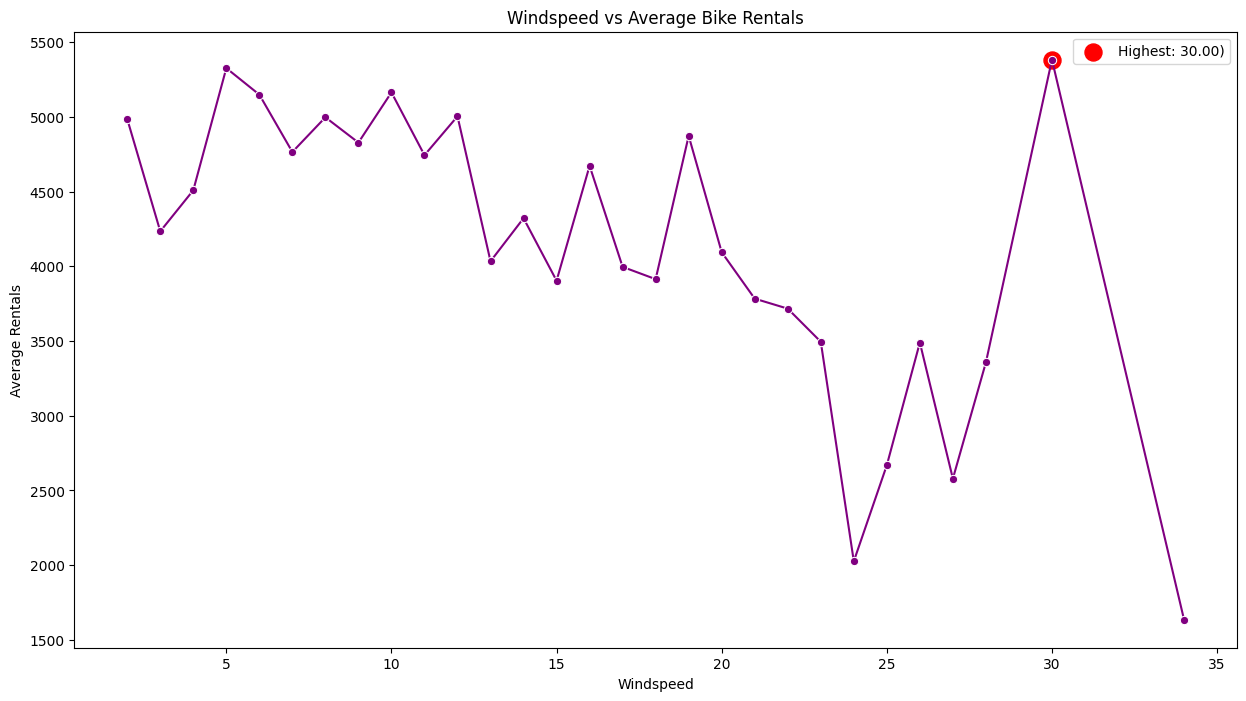

In [7]:
# Find the bin with the highest average bike rentals
highest_windspeed = windspeed_avg_cnt[windspeed_avg_cnt['cnt'] == windspeed_avg_cnt['cnt'].max()]

# Plot the lineplot
plt.figure(figsize=(15, 8))
sns.lineplot(x='windspeed_bin', y='cnt', data=windspeed_avg_cnt, marker='o', color='purple')
plt.title('Windspeed vs Average Bike Rentals')
plt.xlabel('Windspeed')
plt.ylabel('Average Rentals')

# Highlight the maximum point
plt.scatter(
    highest_windspeed['windspeed_bin'],
    highest_windspeed['cnt'],
    color='red',
    s=150,
    label=f"Highest: {highest_windspeed['windspeed_bin'].values[0]:.2f})"
)

plt.legend()
plt.show()

#### Explore Temperature

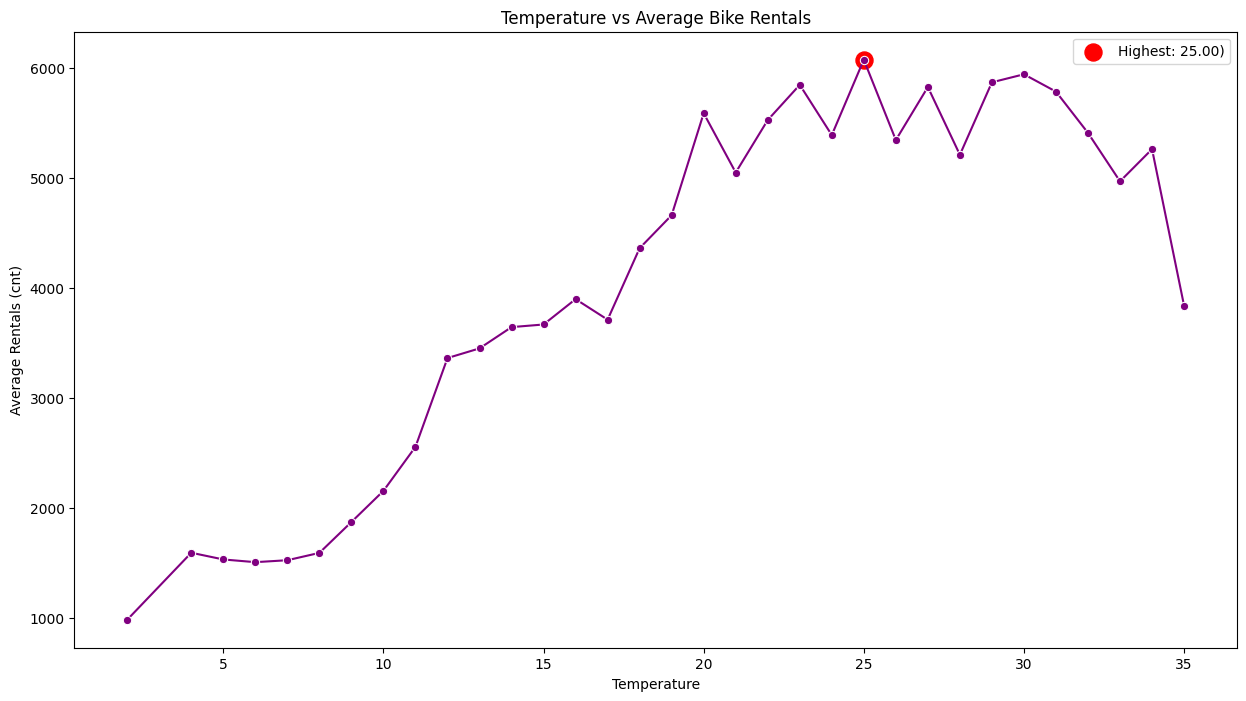

In [8]:
highest_temp = temp_avg_cnt[temp_avg_cnt['cnt'] == temp_avg_cnt['cnt'].max()]

plt.figure(figsize=(15, 8))
sns.lineplot(x='temp_bin', y='cnt', data=temp_avg_cnt, marker='o', color='purple')
plt.title('Temperature vs Average Bike Rentals')
plt.xlabel('Temperature')
plt.ylabel('Average Rentals (cnt)')

plt.scatter(
    highest_temp['temp_bin'],
    highest_temp['cnt'],
    color='red',
    s=150,
    label=f"Highest: {highest_temp['temp_bin'].values[0]:.2f})"
)

plt.legend()
plt.show()

#### Insights


1. Temperature Exploration: Bike rentals increase steadily as the temperature rises from 0°C to around 20°C, **and** then plateau at higher temperatures, remaining stable up to 35°C.
2. Windspeed Exploration: The average bike rentals are lowest when the windspeed is around 25 (actual scale).

###Analyze Categorical Variables

#### Rentals by season

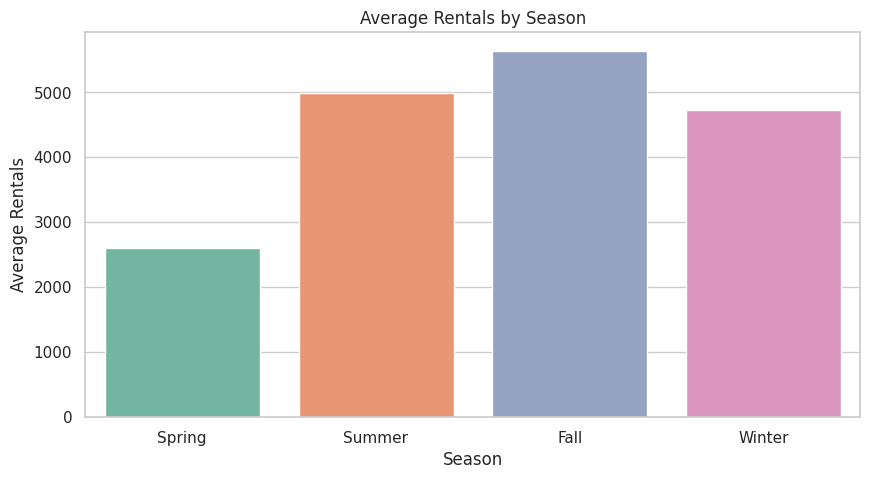

In [11]:
plt.figure(figsize=(10, 5))
season_avg_rentals = df_day.groupby('season')['cnt'].mean().reset_index()
sns.barplot(data=season_avg_rentals, x='season', y='cnt', palette='Set2')
plt.title("Average Rentals by Season")
plt.xlabel("Season")
plt.ylabel("Average Rentals")
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

#### Rentals by working day

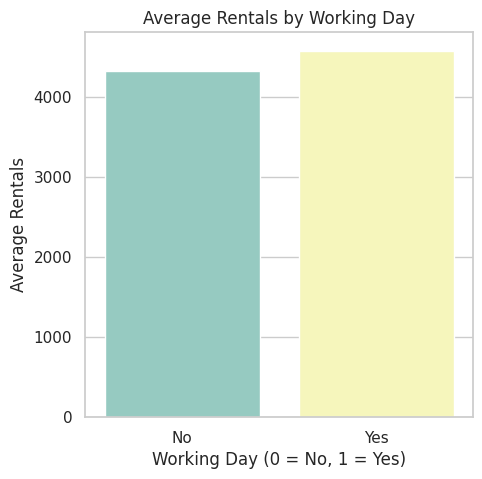

In [12]:
plt.figure(figsize=(5, 5))
workingday_avg_rentals = df_day.groupby('workingday')['cnt'].mean().reset_index()
sns.barplot(data=workingday_avg_rentals, x='workingday', y='cnt', palette='Set3')
plt.title("Average Rentals by Working Day")
plt.xlabel("Working Day (0 = No, 1 = Yes)")
plt.ylabel("Average Rentals")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

#### Rentals by weather situations

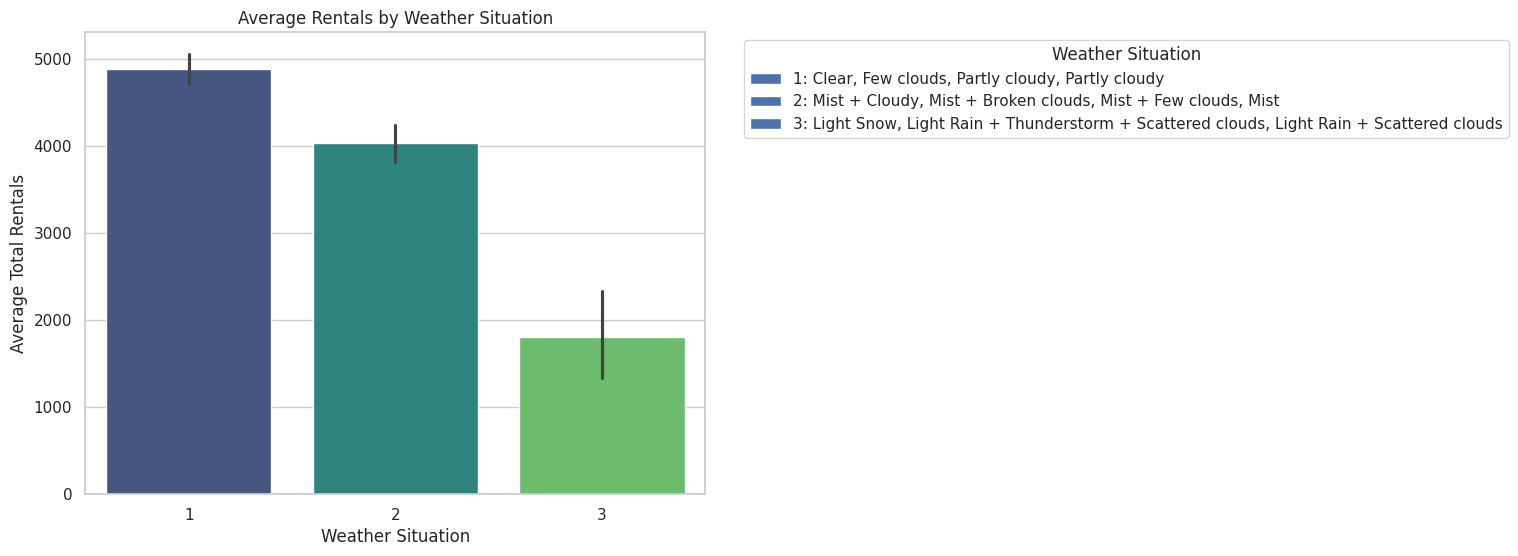

In [17]:
import matplotlib.patches as mpatches

plt.figure(figsize=(8, 6))
sns.barplot(data=df_day, x='weathersit', y='cnt', palette='viridis')
plt.title("Average Rentals by Weather Situation")
plt.xlabel("Weather Situation")
plt.ylabel("Average Total Rentals")
plt.xticks(ticks=[0, 1, 2], labels=['1', '2', '3'])

weather_legend = {
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
}

handles = [mpatches.Patch(label=f'{i+1}: {weather_legend[i+1]}') for i in range(3)]

plt.legend(handles=handles, title="Weather Situation", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### Insights


1. **Rentals by Season**
   - The highest average rentals occur during **Fall**, followed by **Summer**, **Winter**, and **Spring**. This suggests that Fall might have favorable weather conditions, contributing to an increase in bike rentals.
2. **Rentals by Working Day**
   - The highest average rentals are observed on **working days**, suggesting that a significant portion of bike usage is for commuting purposes rather than leisure.
3. **Rentals by weather situations**
  - The bar plot shows that **weather situation 1** (Clear, Few clouds, Partly cloudy) has the highest average total rentals. This suggests that the most favorable weather conditions for bike rentals are when the weather is clear or mildly cloudy, which likely makes it more comfortable for users to rent bikes.

###Time Series Analysis

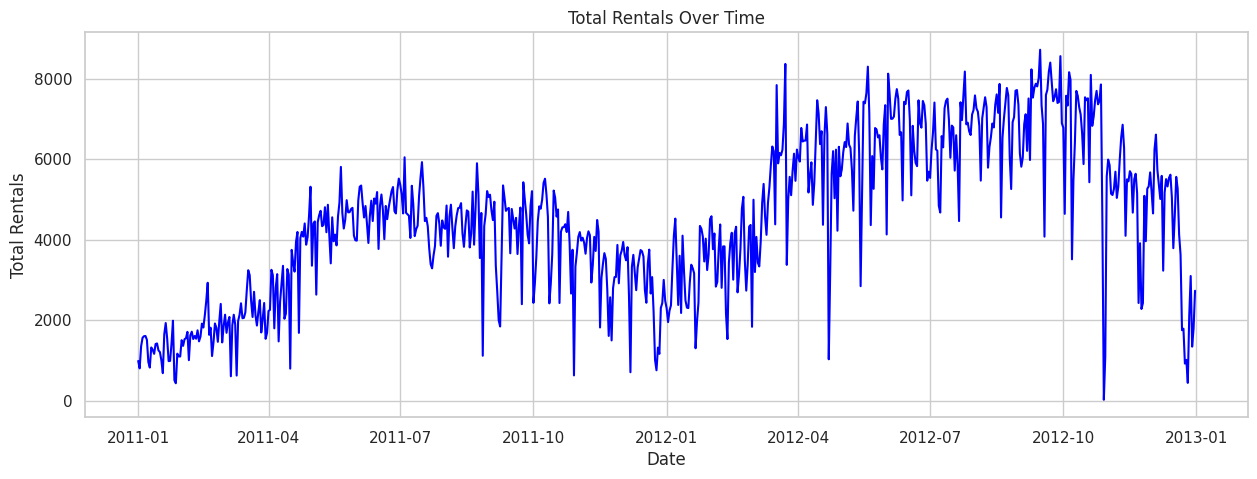

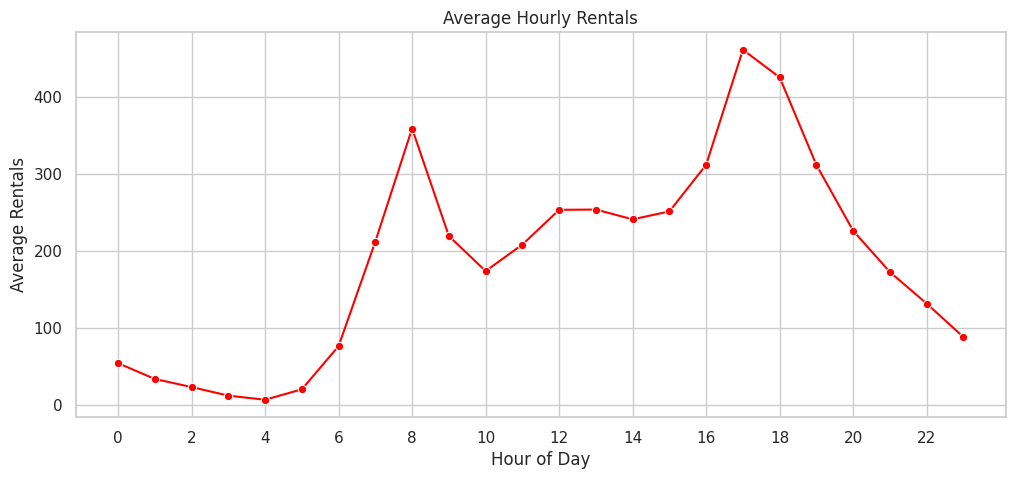

In [14]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_day, x='dteday', y='cnt', color='blue')
plt.title("Total Rentals Over Time")
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(data=df_hour.groupby('hr')['cnt'].mean().reset_index(), x='hr', y='cnt', marker='o', color='red')
plt.title("Average Hourly Rentals")
plt.xlabel("Hour of Day")
plt.ylabel("Average Rentals")
plt.xticks(ticks=range(0, 24, 2))
plt.show()

#### Insights


1. **Rentals Over Time**
  - From the line plot, it is observed that the highest bike rental activity occurred between April 2012 and October 2012. This aligns with spring and summer months, where the weather is typically more favorable for outdoor activities, including biking.
  - Seasonal trends indicate that bike rentals increase during warmer months and decrease during colder months, suggesting a strong influence of temperature and seasonality on rental behavior.

2. **Hourly Rentals Pattern**
  - The hourly rentals pattern reveals a clear peak at 17:00 (5 PM). This is likely due to people using bikes for commuting purposes during the evening rush hour.
  - Secondary peaks may also be visible during early morning hours (8:00 AM), corresponding to the morning commute.
  - During late-night and early morning hours (e.g., 1 AM to 6 AM), the number of rentals drops significantly, indicating minimal activity during these times.

## Visualization & Explanatory Analysis

### Question 1: What are the key factors influencing the total daily bike rentals?

In [22]:
df_day['temp_bin'] = (df_day['temp_actual']).round()
df_day['atemp_bin'] = (df_day['atemp_actual']).round()
df_day['hum_bin'] = (df_day['hum_actual']).round()
df_day['windspeed_bin'] = (df_day['windspeed_actual']).round()

temp_avg_cnt = df_day.groupby('temp_bin')['cnt'].mean().reset_index()
atemp_avg_cnt = df_day.groupby('atemp_bin')['cnt'].mean().reset_index()
hum_avg_cnt = df_day.groupby('hum_bin')['cnt'].mean().reset_index()
windspeed_avg_cnt = df_day.groupby('windspeed_bin')['cnt'].mean().reset_index()

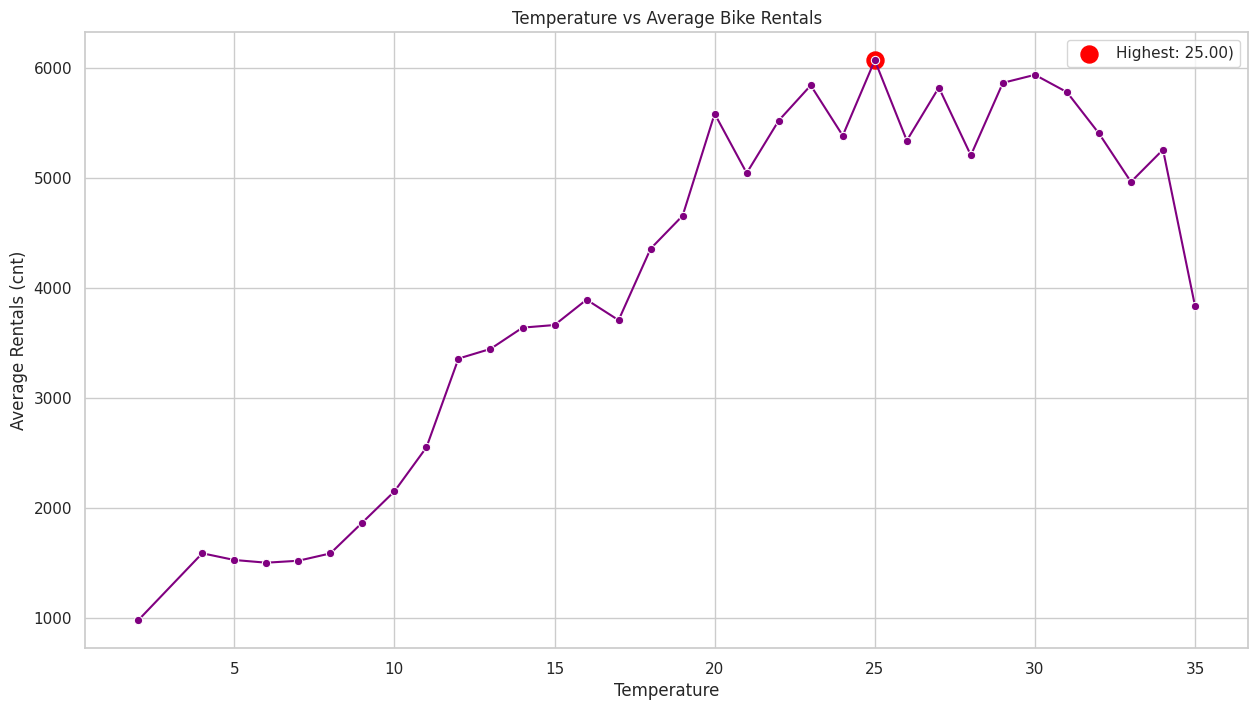

In [23]:
highest_temp = temp_avg_cnt[temp_avg_cnt['cnt'] == temp_avg_cnt['cnt'].max()]

plt.figure(figsize=(15, 8))
sns.lineplot(x='temp_bin', y='cnt', data=temp_avg_cnt, marker='o', color='purple')
plt.title('Temperature vs Average Bike Rentals')
plt.xlabel('Temperature')
plt.ylabel('Average Rentals (cnt)')

plt.scatter(
    highest_temp['temp_bin'],
    highest_temp['cnt'],
    color='red',
    s=150,
    label=f"Highest: {highest_temp['temp_bin'].values[0]:.2f})"
)

plt.legend()
plt.show()

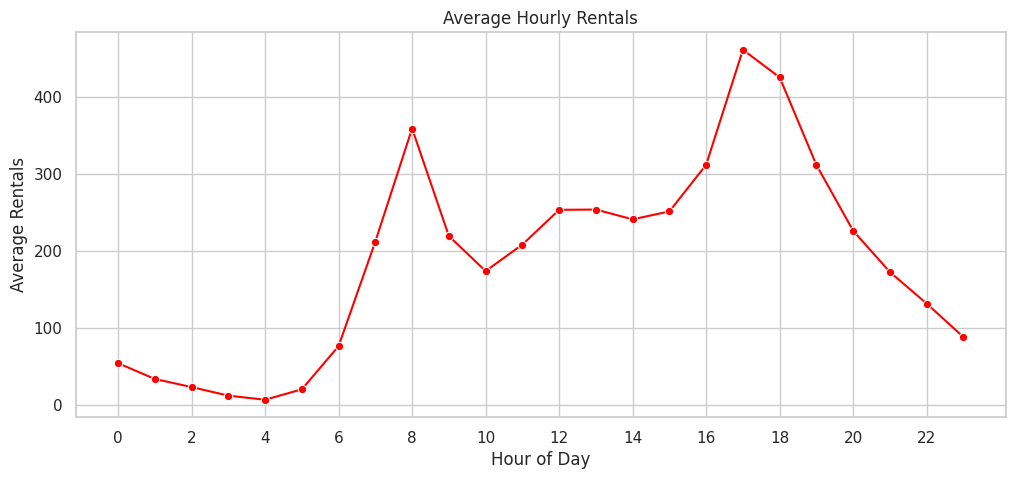

In [25]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_hour.groupby('hr')['cnt'].mean().reset_index(), x='hr', y='cnt', marker='o', color='red')
plt.title("Average Hourly Rentals")
plt.xlabel("Hour of Day")
plt.ylabel("Average Rentals")
plt.xticks(ticks=range(0, 24, 2))
plt.show()

**Insight for Question 1:**

The total daily bike rentals are significantly influenced by temperature and hour of the day.

1. Temperature: Bike rentals steadily increase as the temperature rises from 0°C to around 20°C, indicating that warmer weather encourages biking activity. Beyond 20°C, the rentals plateau, remaining stable up to 35°C, suggesting a comfort zone for users at moderate to warm temperatures.

2. Hour of the Day: The hourly rental pattern reveals distinct peaks during the day, aligning with commuting hours. The highest rentals occur at 5 PM, likely due to evening rush-hour activities. A secondary peak is observed at 8 AM, corresponding to morning commutes. Rentals drop significantly during late-night and early-morning hours, reflecting reduced biking activity during these times.

### Question 2: How do bike rental patterns vary throughout the day, and what are the peak hours for rentals?

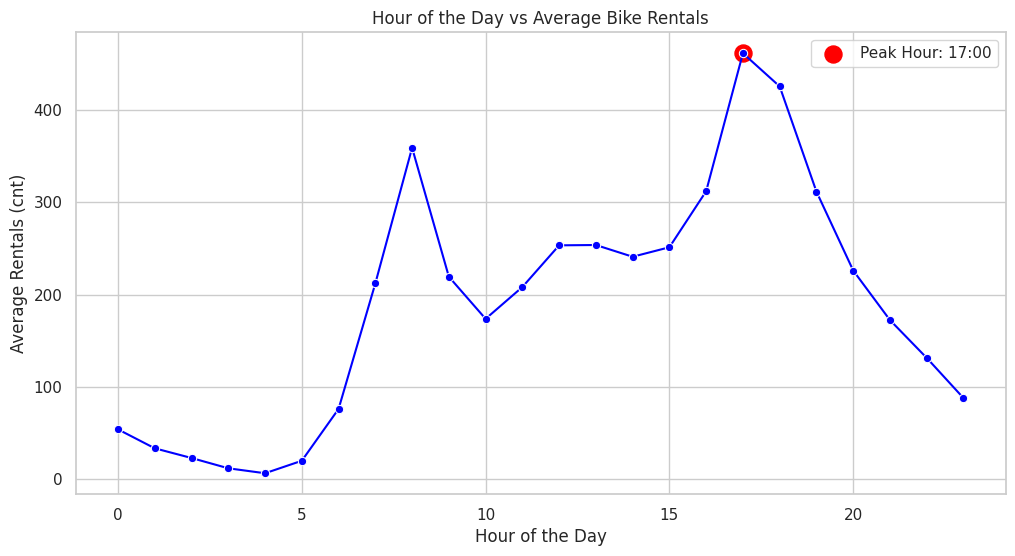

In [26]:
highest_hour = hour_avg_cnt[hour_avg_cnt['cnt'] == hour_avg_cnt['cnt'].max()]

plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=hour_avg_cnt, marker='o', color='blue')
plt.title('Hour of the Day vs Average Bike Rentals')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals (cnt)')

plt.scatter(
    highest_hour['hr'],
    highest_hour['cnt'],
    color='red',
    s=150,
    label=f"Peak Hour: {highest_hour['hr'].values[0]:02d}:00"
)
plt.legend()

plt.show()


**Insight for Question 2:**

Bike rental patterns display distinct fluctuations throughout the day, with a pronounced peak at 17:00. This peak corresponds with the end of the typical workday, indicating that a significant number of riders utilize bike rentals for commuting home or participating in evening leisure activities. Additionally, there is a noticeable increase in rentals during the morning rush hour around 8:00, reflecting the demand for bikes as a convenient transportation option for daily commuters. Analyzing these patterns can provide valuable insights for optimizing bike availability and marketing efforts, ensuring that supply aligns with demand during these critical rental periods.

### Question 3: What is the impact of working days and holidays on bike rentals?

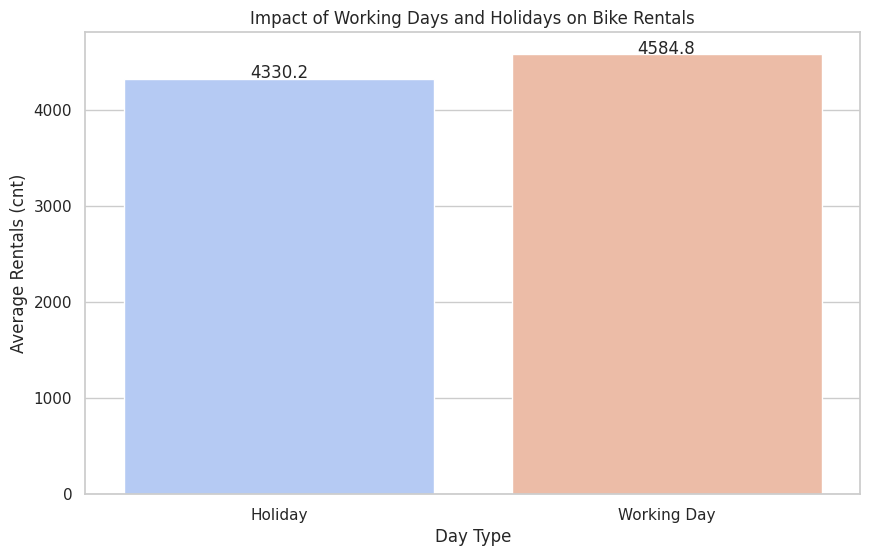

In [27]:
# Calculate average bike rentals grouped by 'workingday' (0 = holiday, 1 = working day)
workingday_avg_cnt = df_day.groupby('workingday')['cnt'].mean().reset_index()
workingday_avg_cnt['workingday'] = workingday_avg_cnt['workingday'].map({0: 'Holiday', 1: 'Working Day'})

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=workingday_avg_cnt, palette='coolwarm')
plt.title('Impact of Working Days and Holidays on Bike Rentals')
plt.xlabel('Day Type')
plt.ylabel('Average Rentals (cnt)')

# Highlight insights
for index, row in workingday_avg_cnt.iterrows():
    plt.text(x=index, y=row['cnt'] + 5, s=f"{row['cnt']:.1f}", ha='center')

plt.show()


**Insight for Question 3:**

The analysis of bike rentals reveals a subtle yet noteworthy distinction between usage on working days and holidays. On average, bike rentals on working days reach approximately 4,500, while holiday rentals hover around 4,300. This indicates that, despite the slight decline during holidays, bike rentals remain consistently high, suggesting that people continue to utilize bike-sharing services for leisure activities, family outings, or recreational purposes during their time off. Understanding this trend can help operators tailor their marketing strategies and optimize bike availability to better accommodate user preferences and maximize rental opportunities throughout the week.

## Analisis Lanjutan (Opsional)

In [29]:
import pandas as pd
import datetime as dt

# Assuming df contains bike rental data with 'dteday' and 'cnt' columns.
df['dteday'] = pd.to_datetime(df['dteday'])
snapshot_date = df['dteday'].max() + pd.Timedelta(days=1)  # Taking the max date for recency calculation

rfm = df.groupby('user_id').agg({
    'dteday': lambda x: (snapshot_date - x.max()).days,  # Recency
    'cnt': ['count', 'sum']  # Frequency and Monetary (using count as monetary)
}).reset_index()

rfm.columns = ['user_id', 'Recency', 'Frequency', 'Monetary']

print(rfm.head())


NameError: name 'df' is not defined

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2